In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import seaborn as sns
import scipy.stats as stats
from scipy.stats.mstats import winsorize
from sqlalchemy import create_engine
import warnings

warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'useducation'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

df = pd.read_sql_query("SELECT * FROM useducation", con = engine)


In [3]:
df.describe()

,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,SUPPORT_SERVICES_EXPENDITURE,OTHER_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
count,1492.000000,1.229000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.280000e+03,1.229000e+03,...,1361.000000,1361.000000,1361.00000,1.361000e+03,1.361000e+03,1.319000e+03,536.000000,532.000000,533.000000,498.000000
mean,2004.433646,9.159308e+05,9.092082e+06,7.663723e+05,4.216553e+06,4.109157e+06,9.196681e+06,4.762966e+06,2.680331e+06,4.292046e+05,...,64538.927259,64271.057311,54268.92432,5.192140e+05,2.470714e+05,8.024415e+05,234.768293,278.414711,218.866154,263.661132
std,7.393983,1.065280e+06,1.174519e+07,1.145242e+06,5.543072e+06,5.482971e+06,1.197813e+07,6.293004e+06,3.353349e+06,5.340693e+05,...,80293.387625,78910.545776,67889.27623,6.436384e+05,3.077056e+05,9.707031e+05,10.221511,10.159722,7.769616,6.803725
min,1992.000000,4.386600e+04,4.656500e+05,3.102000e+04,0.000000e+00,2.209300e+04,4.816650e+05,2.655490e+05,1.399630e+05,1.154100e+04,...,633.000000,437.000000,311.00000,4.878000e+03,1.808000e+03,7.254000e+03,187.134670,232.831510,178.557612,236.379102
25%,1998.000000,2.583140e+05,2.186305e+06,1.893540e+05,1.153097e+06,7.158345e+05,2.165404e+06,1.168032e+06,6.357900e+05,1.028310e+05,...,13739.000000,13342.000000,10919.00000,1.106260e+05,5.147100e+04,1.810650e+05,229.694352,272.761598,214.663401,259.533171
50%,2004.000000,6.483130e+05,5.079546e+06,4.033765e+05,2.537074e+06,2.055780e+06,5.234506e+06,2.657452e+06,1.525406e+06,2.715960e+05,...,43272.000000,43339.000000,36735.00000,3.457750e+05,1.642600e+05,5.503420e+05,237.238552,280.618803,220.416034,265.010912
75%,2011.000000,1.014528e+06,1.085985e+07,8.289660e+05,5.080939e+06,4.768680e+06,1.074519e+07,5.568028e+06,3.229651e+06,5.186000e+05,...,75481.000000,76566.000000,67460.00000,6.119050e+05,2.905020e+05,9.282755e+05,241.995486,285.347428,223.999337,268.190121
max,2017.000000,6.307022e+06,8.921726e+07,9.990221e+06,5.090457e+07,3.610526e+07,8.532013e+07,4.396452e+07,2.605802e+07,3.995951e+06,...,493415.000000,500143.000000,498403.00000,3.929869e+06,2.013687e+06,5.944746e+06,253.420961,300.568235,236.773867,280.499130


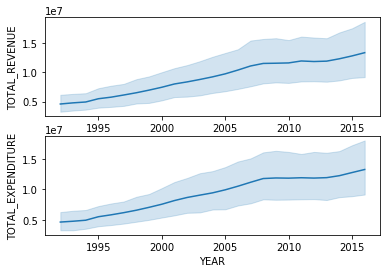

In [5]:
plt.subplot(2,1,1)
sns.lineplot(x = "YEAR", y = "TOTAL_REVENUE",data = df)

plt.subplot(2,1,2)
sns.lineplot(x = "YEAR", y = "TOTAL_EXPENDITURE", data = df)

In [11]:
tennessee_df = df.loc[df["STATE"] == "TENNESSEE"] 
tennessee_df

,PRIMARY_KEY,STATE,YEAR,ENROLL,TOTAL_REVENUE,FEDERAL_REVENUE,STATE_REVENUE,LOCAL_REVENUE,TOTAL_EXPENDITURE,INSTRUCTION_EXPENDITURE,...,GRADES_4_G,GRADES_8_G,GRADES_12_G,GRADES_1_8_G,GRADES_9_12_G,GRADES_ALL_G,AVG_MATH_4_SCORE,AVG_MATH_8_SCORE,AVG_READING_4_SCORE,AVG_READING_8_SCORE
43,1992_TENNESSEE,TENNESSEE,1992,NaN,3080490.0,308571.0,1305381.0,1466538.0,3132516.0,1830264.0,...,65195.0,63358.0,49639.0,530221.0,233430.0,773264.0,210.948227,258.828048,212.531394,NaN
95,1993_TENNESSEE,TENNESSEE,1993,844668.0,3268642.0,334410.0,1535027.0,1399205.0,3286481.0,1969619.0,...,65646.0,64124.0,47668.0,534579.0,236542.0,780663.0,NaN,NaN,NaN,NaN
147,1994_TENNESSEE,TENNESSEE,1994,857014.0,3535898.0,341912.0,1694595.0,1499391.0,3661470.0,2101003.0,...,67339.0,65598.0,49401.0,540994.0,240821.0,792646.0,NaN,NaN,NaN,NaN
200,1995_TENNESSEE,TENNESSEE,1995,870594.0,3870164.0,332765.0,1855788.0,1681611.0,3958973.0,2245634.0,...,67705.0,66513.0,49319.0,549220.0,243169.0,803557.0,NaN,NaN,NaN,NaN
251,1996_TENNESSEE,TENNESSEE,1996,881749.0,4123018.0,340239.0,1967170.0,1815609.0,4284181.0,2363545.0,...,67330.0,66465.0,50332.0,556974.0,247548.0,816175.0,219.176248,263.118935,212.403783,266.311662
303,1997_TENNESSEE,TENNESSEE,1997,886517.0,4390879.0,359191.0,2114799.0,1916889.0,4695409.0,2656651.0,...,67196.0,64518.0,48881.0,551780.0,239659.0,803223.0,NaN,NaN,NaN,NaN
354,1998_TENNESSEE,TENNESSEE,1998,876693.0,4757639.0,405078.0,2268050.0,2084511.0,4988208.0,2829375.0,...,71249.0,66468.0,49440.0,565251.0,240872.0,818641.0,NaN,NaN,NaN,NaN
406,1999_TENNESSEE,TENNESSEE,1999,893842.0,5059587.0,417870.0,2369846.0,2271871.0,5446555.0,3008844.0,...,71433.0,66243.0,53160.0,566148.0,251809.0,831004.0,NaN,NaN,NaN,NaN
445,2016_TENNESSEE,TENNESSEE,2016,999265.0,9585331.0,1095415.0,4395757.0,4094159.0,9680512.0,5401812.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
459,2000_TENNESSEE,TENNESSEE,2000,907222.0,5338531.0,462000.0,2429713.0,2446818.0,5805181.0,3166208.0,...,73373.0,66429.0,48802.0,570014.0,241038.0,824364.0,219.835587,263.436600,213.693918,265.022859
